In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append('../../../nadavp/new_trap/Tools/')
import BeadDataFile
from discharge_tools import *

### Load shake data

In [73]:
foldername = r'/data/new_trap/20190812/Bead1/Shaking/'
foldername = r'/home/data_transfer/data_from_windows/20190813/Bead1/Shaking/'
bdf_shake = load_dir(dirname=foldername, file_prefix='Shaking')

64  files in folder
64  files loaded


In [74]:
bdf_shake1 = bdf_shake[:16:]

In [47]:
bdf_shake1 = bdf_shake1[:-8]

In [54]:
np.mean(BB.cant_pos[0]*50), np.mean(BB.cant_pos[1]*50)

(355.1666223065748, 204.30969084562742)

<IPython.core.display.Javascript object>


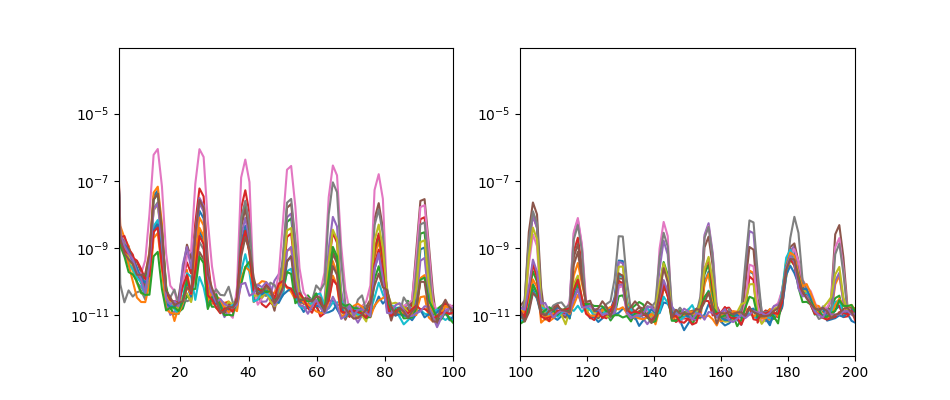

[(100, 200)]

In [75]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
[ax[0].semilogy(*B.welch_psd('x')) for B in bdf_shake1]
ax[0].set(xlim=(2,100))
[ax[1].semilogy(*B.welch_psd('x')) for B in bdf_shake1]
ax[1].set(xlim=(100,200))

In [13]:
BB = bdf_shake1[0]
BB.response_at_freq2

In [76]:
respnoses_13 = [np.std(B.response_at_freq(str_axis='x', drive_freq=13)) for B in bdf_shake1]
respnoses_26 = [np.std(B.response_at_freq(str_axis='x', drive_freq=26)) for B in bdf_shake1]
respnoses_20 = [np.std(B.response_at_freq(str_axis='x', drive_freq=20)) for B in bdf_shake1]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [77]:
len(respnoses_13)

16

<IPython.core.display.Javascript object>


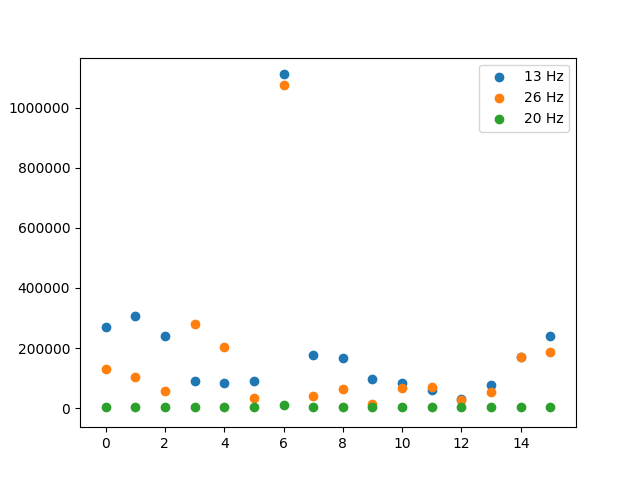

In [78]:
_, ax = plt.subplots()
ax.scatter(range(16), respnoses_13, label='13 Hz')
ax.scatter(range(16), respnoses_26, label='26 Hz')
ax.scatter(range(16), respnoses_20, label='20 Hz')
ax.legend()